## Project description
#### Context
You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.


# Tables Of Contents <a class="anchor" id="table_of_contents"></a>

## Part 1. Prioritizing Hypotheses

The file contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
The task is to:

[1. Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.](#ICE)

[2. Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.](#RICE)

[3. Show how the prioritization of hypotheses changes when you use RICE instead of ICE . Provide an explanation for the changes.](#change)



## Part 2. A/B Test Analysis
- [Data Preprocessing](#Data-Preprocessing)
- [Analyzing the A/B Test:](#Analyzing-the-A/B-Test)

[1. Graph cumulative revenue by group. Make conclusions and conjectures.](#1.-Graph-cumulative-revenue-by-group.-Make-conclusions-and-conjectures.)

[2. Graph cumulative average order size by group. Make conclusions and conjectures.](#2.-Graph-cumulative-average-order-size-by-group.-Make-conclusions-and-conjectures.)

[3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.](#3.-Graph-the-relative-difference-in-cumulative-average-order-size-for-group-B-compared-with-group-A.-Make-conclusions-and-conjectures.)

[4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.](#4.-Calculate-each-group's-conversion-rate-as-the-ratio-of-orders-to-the-number-of-visits-for-each-day.-Plot-the-daily-conversion-rates-of-the-two-groups-and-describe-the-difference.-Draw-conclusions-and-make-conjectures.)

[5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.](#5.-Plot-a-scatter-chart-of-the-number-of-orders-per-user.-Make-conclusions-and-conjectures.)

[6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.](#6.-Calculate-the-95th-and-99th-percentiles-for-the-number-of-orders-per-user.-Define-the-point-at-which-a-data-point-becomes-an-anomaly.)

[7. Plot a scatter chart of order prices. Make conclusions and conjectures.](#7.-Plot-a-scatter-chart-of-order-prices.-Make-conclusions-and-conjectures.)

[8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.](#8.-Calculate-the-95th-and-99th-percentiles-of-order-prices.-Define-the-point-at-which-a-data-point-becomes-an-anomaly.)

[9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.](#9.-Find-the-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-raw-data.-Make-conclusions-and-conjectures.)

[10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.](#10.-Find-the-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-raw-data.-Make-conclusions-and-conjectures.)

[11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.](#11.-Find-the-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-filtered-data.-Make-conclusions-and-conjectures.)

[12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.](#12.-Find-the-statistical-significance-in-average-order-size-between-the-groups-using-the-filtered-data.-Make-conclusions-and-conjectures.)

[13. Make a decision based on the test results.](#13.-Make-a-decision-based-on-the-test-results.)

<div class="alert alert-success" role="alert">
Reviewer's comment:
    
It's nice that you add table of content :)
</div>

# Part 1. Prioritizing Hypotheses

[Go back to the Table of Contents](#table_of_contents)

In [2]:
# importing the libraries
import pandas as pd
import random
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as stats
import seaborn as sns
from scipy import stats as st

# importing datasets
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
# investigating the dataset
print(hypotheses.head())
hypotheses.info()

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#making the column names lowercase for convenience:
hypotheses.columns = map(str.lower, hypotheses.columns)

#### 1. Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority. <a class="anchor" id="ICE"></a>

In [5]:
# applying ICE framwork to prioritize hypotheses
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
# printing the values and sorting them in descending order of priority
print(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2))

                                          hypothesis    ICE
8  Launch a promotion that gives users discounts ...  16.20
0  Add two new channels for attracting traffic. T...  13.33
7  Add a subscription form to all the main pages....  11.20
6  Show banners with current offers and sales on ...   8.00
2  Add product recommendation blocks to the store...   7.00
1  Launch your own delivery service. This will sh...   2.00
5  Add a customer review page. This will increase...   1.33
3  Change the category structure. This will incre...   1.12
4  Change the background color on the main page. ...   1.00


#### Conclusions
After applying ICE framework we see that the highest priority belongs to 8, 0 and 7 hypotheses.

#### 2. Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority. <a class="anchor" id="RICE"></a>

In [6]:
# applying RICE framwork to prioritize hypotheses
hypotheses['RICE'] = (hypotheses['impact'] * hypotheses['reach'] * hypotheses['confidence']) / hypotheses['effort']
# printing the values and sorting them in descending order of priority
print(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### Conclusions <a class="anchor" id="change"></a>
Hypotheses #7 is an obvious leader in this rating. It differs from ICE results, because the Reach parameter played it's part and this hypotheses will affect much more users. So we'll take it into account and concentrate on testing it further.

# Part 2. A/B Test Analysis

## Data Preprocessing

[Go back to the Table of Contents](#table_of_contents)

In [7]:
# importing datasets
orders = pd.read_csv('/datasets/orders_us.csv')
visitors = pd.read_csv('/datasets/visits_us.csv')

In [8]:
# investigating the 'orders' dataset:
print(orders.info())
print(orders.head())
print(orders.tail())
print(orders.sample())
print(orders.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
      transactionId   visitorId        date  revenue group
1192     2662137336  3733762160  2019-08-14    100.8     B
1193     2203539145   370388673  2019-08-14     50.1     A
1194     1807773912   573423106  2019-08-14    165.3     A
1195     1947021204  1614305549  2019-08-14      5.5     A
1196  

In [9]:
# checking if the dataset contains the duplicates
orders.duplicated().sum()

0

In [10]:
#checking the missing values by columns:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
# checking if there are users belonging to more than one group
users_group = orders.groupby('visitorId').agg({'group':'nunique'})
print(users_group.head(10))
# grouping the users belonging to one and only group together
users_one_group = users_group.query('group <= 1')
orders = orders[orders['visitorId'].isin(users_one_group.index)]
#checking the number of users in each group
orders['group'].value_counts()

           group
visitorId       
5114589        1
6958315        1
8300375        2
11685486       1
39475350       1
47206413       1
48147722       1
54447517       1
56960363       1
66685450       1


B    548
A    468
Name: group, dtype: int64

In [12]:
# creating a variable to store only the users belonhing to sample A
users_a = orders.query('group=="A"')
# creating a variable to store only the users belonhing to sample B
users_b = orders.query('group=="B"')

# taking sample from orders_b to make both samples equal in size
users_b_random_subset = orders_b.sample(468, random_state=3)
users_sample = users_a.append(orders_b_random_subset)

# sorting the 'orders' table by date
orders_final = orders.sort_values(by=['date'])

In [13]:
# investigating the 'visitors' dataset:
print(visitors.info())
print(visitors.head())
print(visitors.tail())
print(visitors.sample())
print(visitors.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
          date group  visits
57  2019-08-27     B     720
58  2019-08-28     B     654
59  2019-08-29     B     531
60  2019-08-30     B     490
61  2019-08-31     B     718
          date group  visits
32  2019-08-02     B     581
           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


In [14]:
# checking if the dataset contains the duplicates
visitors.duplicated().sum()

0

In [15]:
#checking the missing values by columns:
visitors.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [16]:
# converting the 'date' column to 'datetime' data type and mapping it
orders_final['date'] = orders_final['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Conclusions
Investigating the 'orders' dataset:
- The dataset consists of 1197 rows and 5 columns. Data types: float64(1), int64(2), object(2).
- Column names are self-descriptive and I'won't change them.
- I've changed the data type in 'date' column to 'datetime' data type.
- I've found that there are visitors belonging to groups A and B at the same time. These users were dropped from the final dataset. After this operation the number of users in groups A(468) and B(548) is different. I've created a random sample from users in group B of the same size as group A for some of the further calculations.
- No missing values found.

Investigating the 'visitors' dataset:
- The dataset consists of 62 rows and 3 columns. Data types: int64(1), object(2). 
- Column names are self-descriptive and I'won't change them.
- I've changed the data type in 'date' column to 'datetime' data type. 
- No duplicates found.
- No missing values found.

## Analyzing the A/B Test

### 1. Graph cumulative revenue by group. Make conclusions and conjectures.

[Go back to the Table of Contents](#table_of_contents)

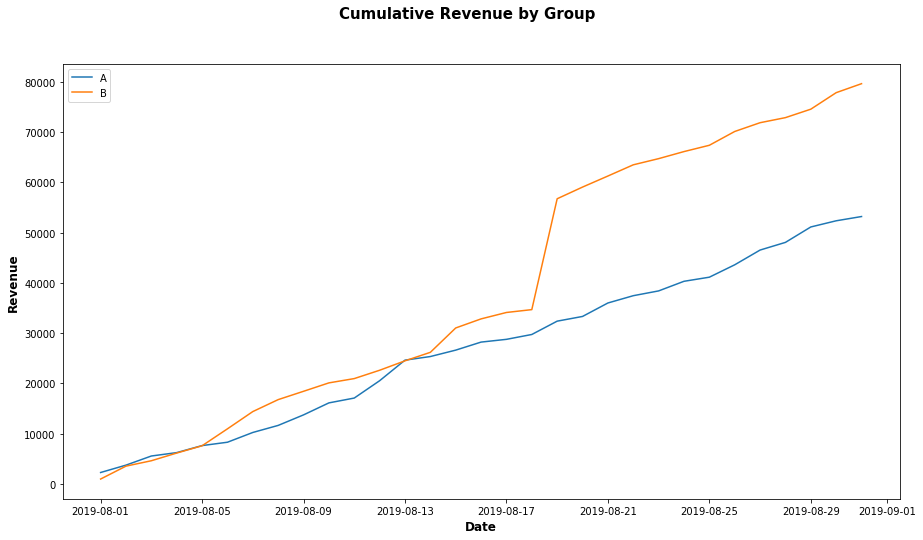

In [17]:
# creating a dataset with dates per each group and dropping the duplicates
datesGroups = orders_final[['date','group']].drop_duplicates().sort_values(by=['date'])

# declaring 'ordersAggregated' variable to store: the date, the A/B test group, 
# the number of distinct orders for the test group up to the specified date, inclusive, 
# the number of distinct users in the test group who make at least one order up to the specified date, inclusive, 
# total revenue from orders in the test group up to the specified date, inclusive;
# sorting the values by date and group
ordersAggregated = datesGroups.apply(
lambda x: orders_final[np.logical_and(orders_final['date'] <= x['date'], orders_final['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# declaring the visitorsAggregated variable to store: the date, the A/B test group, 
# the number of distinct visitors in the test group up to the specified date, inclusive
# sorting the values by date and group
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# defining the variable 'cumulativeData' by merging aggregeted visitors and orders and assigning the names to the columns
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# plotting the group A revenue graph
#setting size of a graph
fig = plt.figure(figsize = (15, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');
# defining axes and title
plt.suptitle("Cumulative Revenue by Group", weight='bold', size=15)
plt.xlabel('Date', weight='bold', size=12)
plt.ylabel('Revenue', weight='bold', size=12)
# plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.legend()

#### Conclusions

Both of segments have growing revenue rate. In the beginning they were equal, probably because of the low data base, but after 17.08.2019 segment B shows much higher revenue. Both of them have a steady and stabilized growing value. Segment B shows higher performance.

### 2. Graph cumulative average order size by group. Make conclusions and conjectures.

[Go back to the Table of Contents](#table_of_contents)

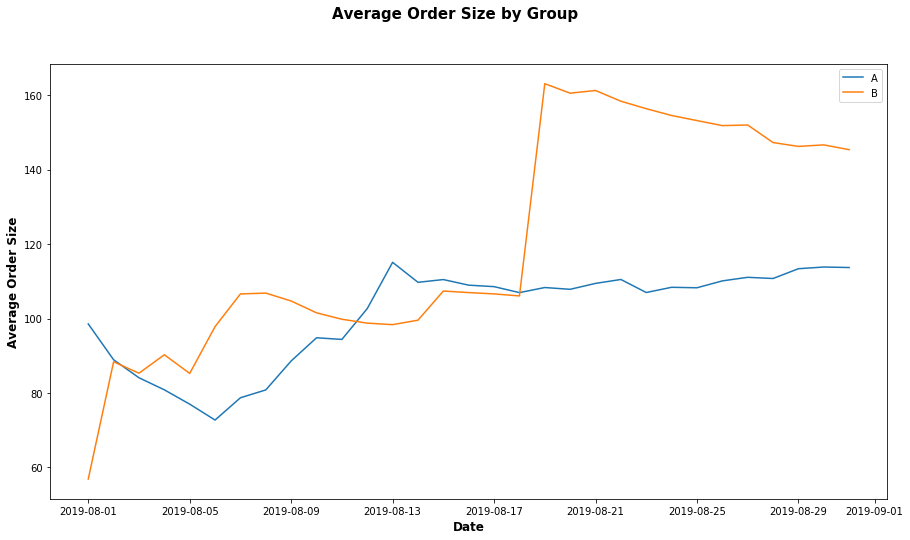

In [18]:
# defining the graph size
fig = plt.figure(figsize = (15, 8))
# defining axes and title
plt.suptitle("Average Order Size by Group", weight='bold', size=15)
plt.xlabel('Date', weight='bold', size=12)
plt.ylabel('Average Order Size', weight='bold', size=12)

# plotting the group A average order size by dividing cumulative revenue by the cumulative number of orders
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')


# plotting the group B average order size by dividing cumulative revenue by the cumulative number of orders
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

#### Conclusions
There are several changes, especially with graph B, and we should check if the outliers are distorting the data.

### 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

[Go back to the Table of Contents](#table_of_contents)

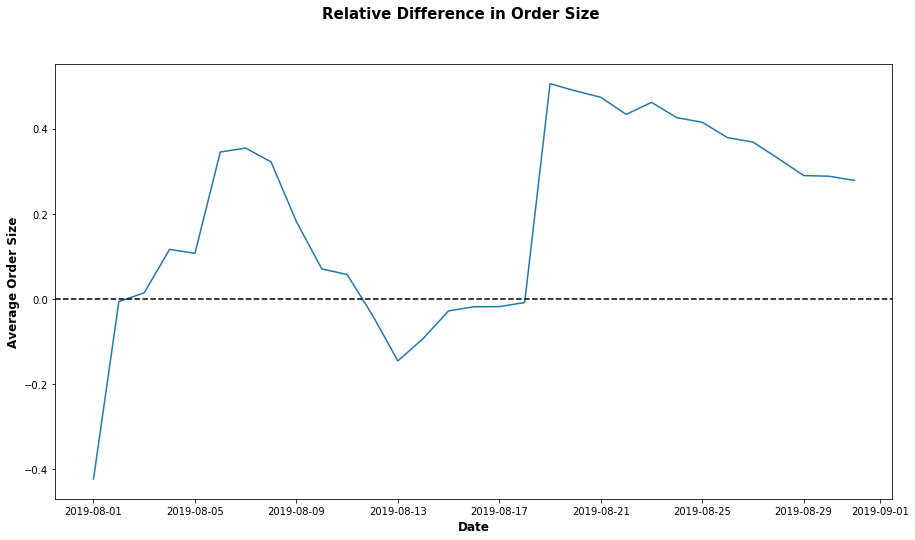

In [19]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average order sizes
# defining the graph size
fig = plt.figure(figsize = (15, 8))
# defining axes and title
plt.suptitle("Relative Difference in Order Size", weight='bold', size=15)
plt.xlabel('Date', weight='bold', size=12)
plt.ylabel('Average Order Size', weight='bold', size=12)


plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')

#### Conclusions
The graph of the difference in cumulative average order size shows fluctuations: it allows us to detect anomalies. Maybe  abnormally high purchases are causing fluctuations.

### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

[Go back to the Table of Contents](#table_of_contents)

['2019-07-31', '2019-09-01', 0, 0.05]

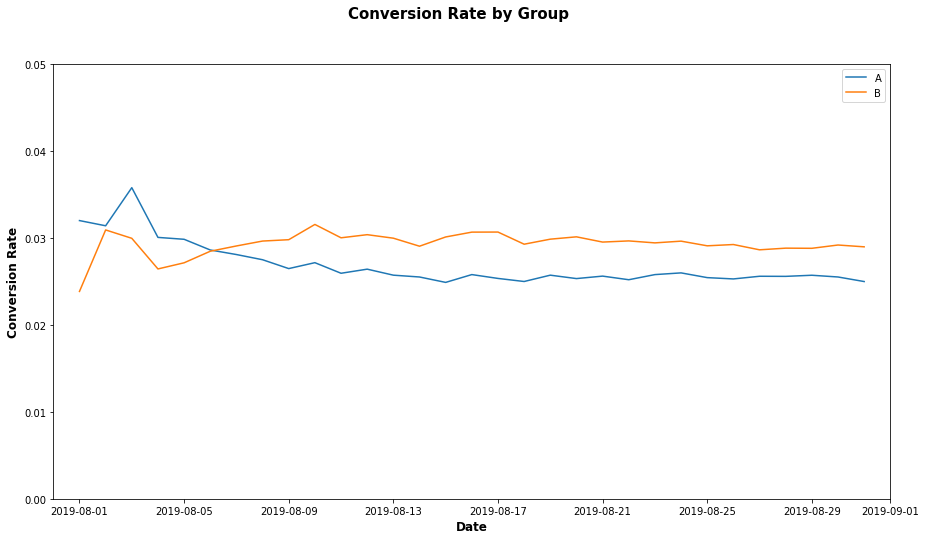

In [20]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
# defining the graph size
fig = plt.figure(figsize = (15, 8))
# defining axes and title
plt.suptitle("Conversion Rate by Group", weight='bold', size=15)
plt.xlabel('Date', weight='bold', size=12)
plt.ylabel('Conversion Rate', weight='bold', size=12)

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# setting the axes' scale
plt.axis(["2019-07-31", '2019-09-01', 0, 0.05])

#### Conclusions
At the beginning segment A showed higher conversion rate, but segment B gradually raised the conversion and now both of them are steady and stabilized, with segment B showing higher conversion, segment A is slightly pointing down.

['2019-07-31', '2019-09-01', -0.5, 0.5]

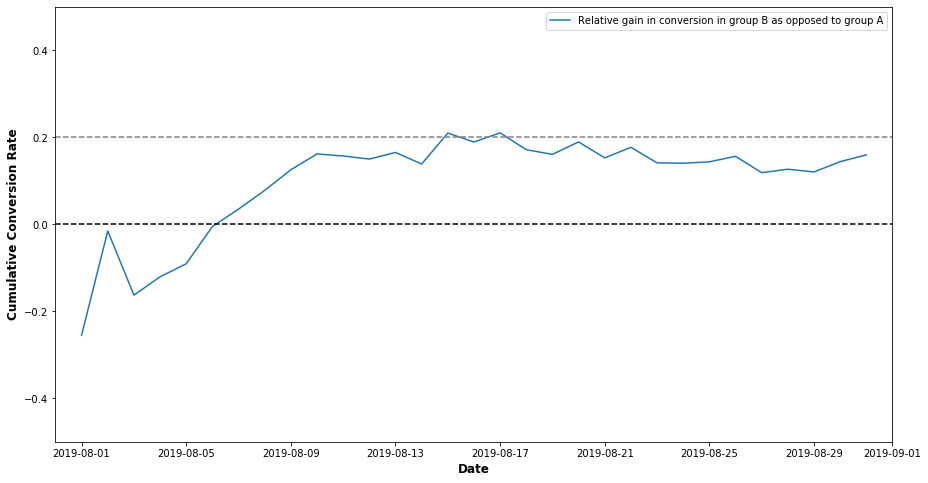

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# defining the graph size
fig = plt.figure(figsize = (15, 8))
# defining axes and title
plt.xlabel('Date', weight='bold', size=12)
plt.ylabel('Cumulative Conversion Rate', weight='bold', size=12)

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-07-31", '2019-09-01', -0.5, 0.5])

#### Conclusions
The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: they have a tendency to grow and have stabilized around 18% higher than group A.

### 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

[Go back to the Table of Contents](#table_of_contents)

Text(0, 0.5, 'Number of Users')

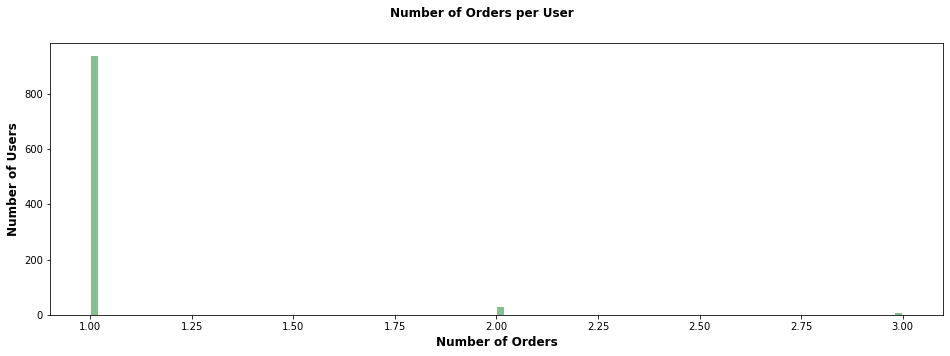

In [22]:
# defining the number of orders per visitor
ordersByUsers = orders_final.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitors','orders']

# plotting a distribution histogram for the number of orders per user using the hist() method
ordersByUsers['orders'].hist(grid=False, bins=100, figsize=(16,5), color='#86bf91', zorder=2, rwidth=0.9);
plt.suptitle("Number of Orders per User", weight='bold', size=12)
plt.xlabel('Number of Orders', weight='bold', size=12)
plt.ylabel('Number of Users', weight='bold', size=12)
   

#### Conclusions
The majority of customers placed only one order. However, a small share placed two to three orders.

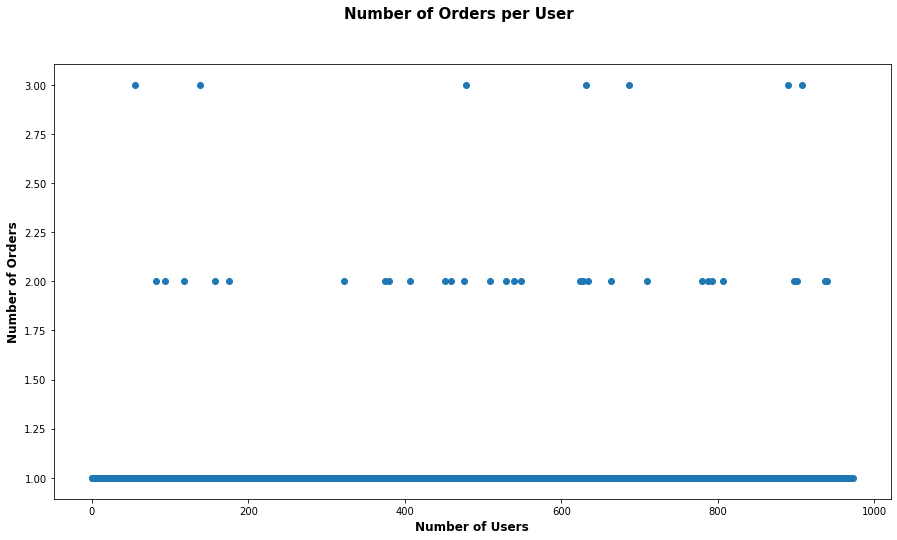

In [23]:
# plotting a scatter chart with the number of orders per user 
# (the range of numbers from 0 to the number of observations in ordersByUsers)

# defining the graph size
fig = plt.figure(figsize = (15, 8))
# defining axes and title
plt.suptitle("Number of Orders per User", weight='bold', size=15)
plt.xlabel('Number of Users', weight='bold', size=12)
plt.ylabel('Number of Orders', weight='bold', size=12)

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

#### Conclusions
There are very few visitors who placed more than one order. These cases might turn out to be anomalies. In order to check it we should calculate the percentiles.

### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

[Go back to the Table of Contents](#table_of_contents)

In [24]:
print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))
print(np.percentile(ordersByUsers['orders'], [95, 99]))

       visitors  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
[1. 2.]


#### Conclusions
Not more than 5% of users placed more than 1 order, not more than 1% placed more than 2 orders.

Text(0, 0.5, 'Revenue')

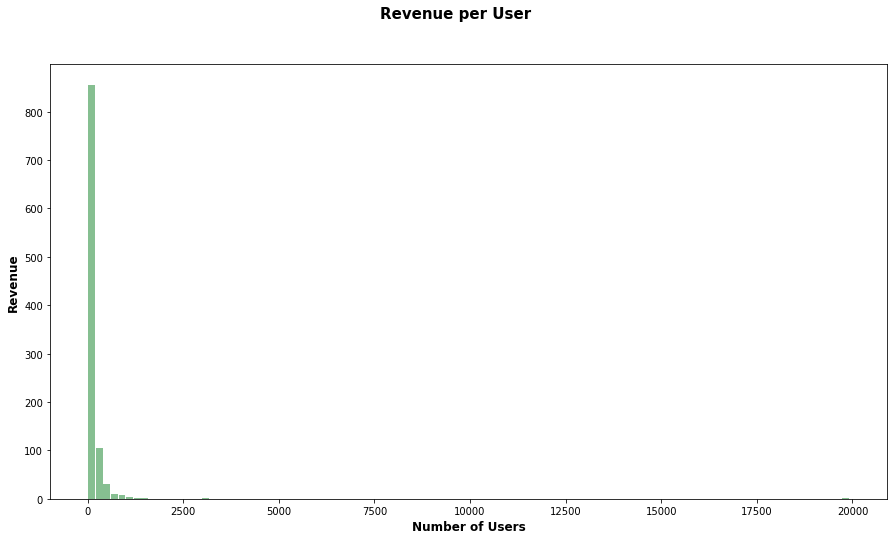

In [25]:
# plotting a distribution histogram of revenues per user using the hist() method
ax = orders_final['revenue'].hist(grid=False, bins=100, figsize=(15,8), color='#86bf91', zorder=2, rwidth=0.9);
# defining axes and title
plt.("Revenue per User", weight='bold', size=15)
plt.xlabel('Number of Users', weight='bold', size=12)
plt.ylabel('Revenue', weight='bold', size=12)

#### Conclusions
Most of the orders' revenue was below 2500. However this chart doesn't reflect the number of outliers, so let's plot a scatter revenue distribution.

### 7. Plot a scatter chart of order prices. Make conclusions and conjectures.

[Go back to the Table of Contents](#table_of_contents)

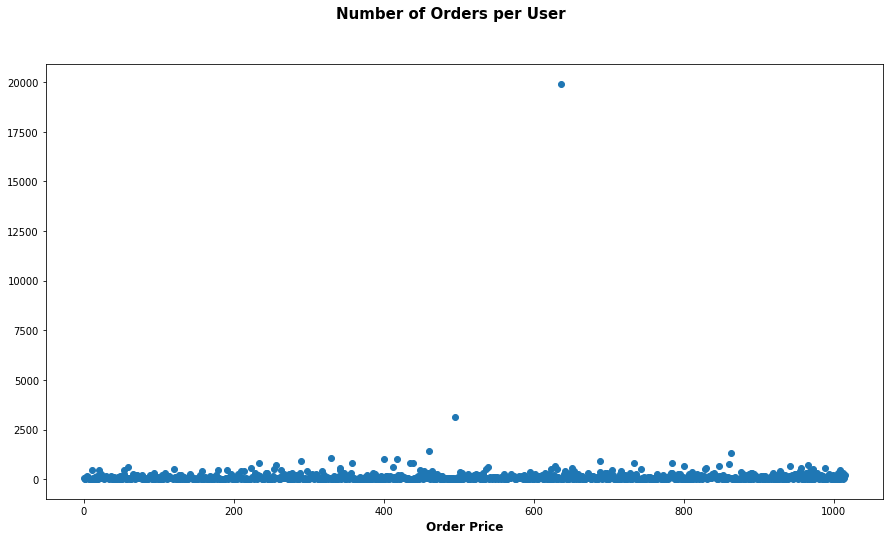

In [26]:
x_values = pd.Series(range(0,len(orders_final['revenue'])))
# plotting a distribution scatterplot of order prices per user using scatter plot
# defining the graph size
fig = plt.figure(figsize = (15, 8))
# defining axes and title
plt.suptitle("Number of Orders per User", weight='bold', size=15)
plt.xlabel('Order Price', weight='bold', size=12)

plt.scatter(x_values, orders_final['revenue']);

##### Conclusions 
There aren't many orders with revenue higher than 2500. The 20000 revenue order looks absolutely abnormal.

### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

[Go back to the Table of Contents](#table_of_contents)

In [27]:
# calculating  the 95th, and 99th sample percentiles for order prices per user 
print(np.percentile(orders_final['revenue'], [95, 99]))
orders_final['revenue'].describe()

[414.275 830.3  ]


count     1016.000000
mean       130.770866
std        648.079810
min          5.000000
25%         20.775000
50%         50.100000
75%        126.950000
max      19920.400000
Name: revenue, dtype: float64

#### Conclusions 
Not more than 5% of users placed the orders that cost more than 414.28, not more than 1% placed the orders bigger than 830.3.

### 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

[Go back to the Table of Contents](#table_of_contents)

In [28]:
ordersByUsersA = orders_final[orders_final['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders_final[orders_final['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.006
0.160


#### Conclusions 
Based on the raw data, there is difference between groups A and B.
The p-value is smaller than 0.05, so we reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. The groups' conversion rates have statistically significant differences. The relative conversion of group B compared to group A is 16%.

### 10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

[Go back to the Table of Contents](#table_of_contents)

In [29]:
# to calculate the statistical significance of the difference in the segments' average order size, 
# let's pass the data on revenue to the mannwhitneyu() criterion
print("{0:.3f}".format(stats.mannwhitneyu(orders_final[orders_final['group']=='A']['revenue'], orders_final[orders_final['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders_final[orders_final['group']=='B']['revenue'].mean()/orders_final[orders_final['group']=='A']['revenue'].mean()-1))

0.431
0.278


#### Conclusions
The p-value is greater than 0.05, so there are no statistical differences in average order size between the groups.
But the relative difference is quite big - 27.8%.

### 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

Now let's remove anomalies from our data.
The 95th and 99th percentiles for average order size were 414.28 and  830.3. For number of users, the 95th and 99th percentiles were one and two orders.

We'll consider anomalous users those who made two or more orders or placed one for more than 600. Thus, we'll remove the 1% of users with the most orders and between 1% and 5% of the most expensive orders.
It's users that we'll be removed, but first let's identify anomalous orders. Then we'll add the users who made them to the list of anomalies.

In [62]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders_final[orders_final['revenue'] > 600]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(10))
print(abnormalUsers.shape) 

1099    148427295
33      249864742
684     358944393
36      366673373
648     382846391
51      406208401
67      522292794
58      611059232
64      678354126
72      759473111
Name: visitorId, dtype: int64
(59,)


We have 59 anomalous users in total.

[Go back to the Table of Contents](#table_of_contents)

### 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

[Go back to the Table of Contents](#table_of_contents)

In [60]:
# finding the statistical significance of the difference in average order size between the groups using the filtered data
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

# printing the results
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00367
0.191


#### Conclusions
The p-value significant level is reached. Group B is much better than group A in performance 19.6%).

In [61]:
# performing Mann-Whitney test
print("{0:.3f}".format(stats.mannwhitneyu(
    orders_final[np.logical_and(
        orders_final['group']=='A',
        np.logical_not(orders_final['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_final[np.logical_and(
        orders_final['group']=='B',
        np.logical_not(orders_final['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders_final[np.logical_and(orders_final['group']=='B',np.logical_not(orders_final['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_final[np.logical_and(
        orders_final['group']=='A',
        np.logical_not(orders_final['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.465
0.023


#### Conclusions 

Now the statistical significance of the difference in average order size between the groups is significant. The amount of noise in data decreased. The variance is decreased, so 6.1% difference in conversion is quite significant. Now we see that group B performed much better.

[Go back to the Table of Contents](#table_of_contents)

### 13. Make a decision based on the test results. 

The possible decisions are:
1. Stop the test, consider one of the groups the leader.
2. Stop the test, conclude that there is no difference between the groups. 
3. Continue the test.

There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data.
The raw data didn't show a statistically significant difference between the groups in terms of average purchase size. However, after the anomalies were removed, it turned out there was a statistically significant difference.
The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: they have a tendency to grow or have stabilized around the mean.

So I'd recoomend option 1: stop the test and consider that group B is a leader.